In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cd(x,y):
    if abs(x-y) < 1/2:
        return 2*(abs(x-y))
    else:
        return 2*(1-abs(x-y))


In [3]:
# f:[0,1] -> R which is a distance function (Assume our circle has circumference 2)
def f_log(d):
    return np.log(1+d)

def f_linear(d):
    return d

def f_sqrt(d):
    return np.sqrt(d)

def f_constant(d):
    return 1/2

def f_hyperbolic(r, d):
    return np.arccosh(max(np.cosh(r)**2 - np.sinh(r)**2 * np.cos(np.pi*d), 1))/(2*r)

In [4]:
def distortion_loss(f, n_iter = 5000, regression = False):
    sum = 0
    d_tape = []
    f_tape = []
    for i in range(n_iter):
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        d_tape.append(cd(x,y))
        f_tape.append(f(cd(x,y)))
    
    if regression:
        X2 = np.array(f_tape)**2
        XY = np.array(d_tape)*np.array(f_tape)
        r = np.sum(XY)/np.sum(X2)
        sum = np.sum(np.square(r * np.array(f_tape) - np.array(d_tape)))
        avg = np.sqrt(sum/n_iter)
        return avg, r
    else:
        sum = np.sum(np.square(np.array(f_tape) - np.array(d_tape)))
        avg = np.sqrt(sum/n_iter)
        return avg

In [5]:
def hyp_loss(f, n_iter = 5000):
    sum = 0
    for i in range(n_iter):
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        z = np.random.uniform(0,1)
        w = np.random.uniform(0,1)
        
        A = f(cd(x,y)) + f(cd(z,w))
        B = f(cd(x,z)) + f(cd(y,w))
        C = f(cd(x,w)) + f(cd(y,z))

        max_pair = max(A,B,C)
        min_pair = min(A,B,C)
        med_pair = (A+B+C) - max_pair - min_pair

        delta = (max_pair - med_pair)/2
        sum += delta**2
    avg = np.sqrt(sum/n_iter)
    return avg

In [6]:
print("Dist Loss\t:", distortion_loss(f_log))
print("Hyp Loss\t:", hyp_loss(f_log))
print('-----------------------------------------------------')
print("Dist Loss\t:", distortion_loss(f_linear))
print("Hyp Loss\t:", hyp_loss(f_linear))
print('-----------------------------------------------------')
print("Dist Loss\t:", distortion_loss(f_sqrt))
print("Hyp Loss\t:", hyp_loss(f_sqrt))
print('-----------------------------------------------------')
print("Dist Loss\t:", distortion_loss(f_constant))
print("Hyp Loss\t:", hyp_loss(f_constant))

Dist Loss	: 0.14617483580602136
Hyp Loss	: 0.06810359717235638
-----------------------------------------------------
Dist Loss	: 0.0
Hyp Loss	: 0.11147100377538283
-----------------------------------------------------
Dist Loss	: 0.1819619047495686
Hyp Loss	: 0.07414758500385508
-----------------------------------------------------
Dist Loss	: 0.28959016611082083
Hyp Loss	: 0.0


In [7]:
dist_loss_tape = []
hyp_loss_tape = []
coeff_tape = []
r_tape = np.arange(1, 101)/20
for r in r_tape:
    d_loss, coeff = distortion_loss(lambda d: f_hyperbolic(r, d), regression = True)
    h_loss = coeff * hyp_loss(lambda d: f_hyperbolic(r, d))
    dist_loss_tape.append(d_loss)
    hyp_loss_tape.append(h_loss)
    coeff_tape.append(coeff)
    print("r = ", r, "Dist Loss\t:", d_loss, "Hyp Loss\t:", h_loss, "Coeff\t:", coeff)

r =  0.05 Dist Loss	: 0.070250124002421 Hyp Loss	: 0.07657700978949242 Coeff	: 0.8119288037692286
r =  0.1 Dist Loss	: 0.06832788243005851 Hyp Loss	: 0.0775642731293542 Coeff	: 0.8078375051350261
r =  0.15 Dist Loss	: 0.07071641503226718 Hyp Loss	: 0.07650637040820159 Coeff	: 0.8135867883353328
r =  0.2 Dist Loss	: 0.07026980739064434 Hyp Loss	: 0.0776221331281424 Coeff	: 0.808676740049785
r =  0.25 Dist Loss	: 0.06988275759044153 Hyp Loss	: 0.07585123189252974 Coeff	: 0.8077870388980322
r =  0.3 Dist Loss	: 0.07145055030775568 Hyp Loss	: 0.07551596145266584 Coeff	: 0.807602792340249
r =  0.35 Dist Loss	: 0.07138201655372672 Hyp Loss	: 0.07601670217460603 Coeff	: 0.8053039625998697
r =  0.4 Dist Loss	: 0.07342157470731026 Hyp Loss	: 0.07463021898241211 Coeff	: 0.8064904112038411
r =  0.45 Dist Loss	: 0.07421628103673009 Hyp Loss	: 0.07505769032483302 Coeff	: 0.8036071936329475
r =  0.5 Dist Loss	: 0.07452974130603493 Hyp Loss	: 0.07356096831994186 Coeff	: 0.7999624590753786
r =  0.55 D

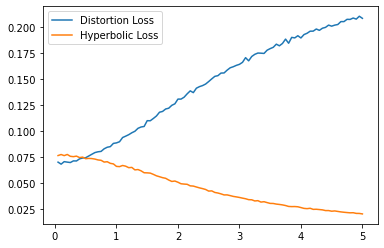

In [8]:
plt.plot(np.arange(1,101)/20, dist_loss_tape, label = "Distortion Loss")
plt.plot(np.arange(1,101)/20, hyp_loss_tape, label = "Hyperbolic Loss")
# plt.plot(np.arange(1,101)/50, coeff_tape, label = "Coefficient")
plt.legend()

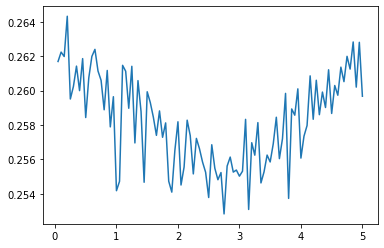

In [9]:
plt.plot(np.arange(1,101)/20, np.array(dist_loss_tape) + 2.5 * np.array(hyp_loss_tape), label = "Distortion Loss")